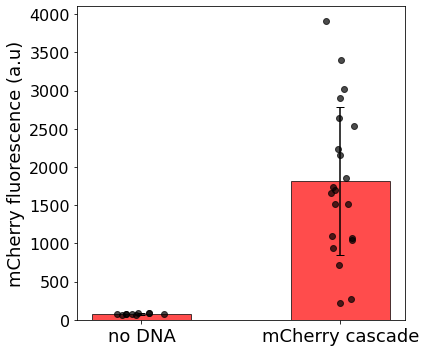

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_names = ["data_NC1-plasmid.xlsx", "data_PC.xlsx"]
time_point = 480  # time point in minutes 8h
fluorophore = 'TexRed'  # Change to 'TexRed' or 'GFP' as needed

# Define a function to extract data at the specified time point
def extract_data_at_time(file_name, time_point, fluorophore='TexRed'):
    # Load the Excel file
    xls = pd.ExcelFile(file_name)
    
    # List to hold fluorescence data at the specified time point
    fluorescence_values = []
    
    # Loop over each sheet
    for sheet_name in xls.sheet_names:
        # Read the sheet into a DataFrame
        df = xls.parse(sheet_name)
        
        # Filter the row at the specified time point
        row = df[df['Time [min]'] == time_point]
        
        # If the row exists at this time point, extract fluorescence data for the selected fluorophore
        if not row.empty:
            fluor_columns = [col for col in df.columns if fluorophore in col]
            fluorescence_values.extend(row[fluor_columns].values.flatten())  # Flatten to get values in a single list
            
    return fluorescence_values

# Initialize lists to store data for each file
means = []
std_devs = []
all_values = []


# Loop over each file and calculate mean and std deviation at the time point
for file_name in file_names:
    # Extract the fluorescence data at the specified time point
    fluorescence_values = extract_data_at_time(file_name, time_point, fluorophore)
    
    # Calculate mean and standard deviation
    mean_fluor = np.mean(fluorescence_values)
    std_fluor = np.std(fluorescence_values)
    
    # Store the results
    means.append(mean_fluor)
    std_devs.append(std_fluor)
    all_values.append(fluorescence_values)
    

# Define unique markers for each replicate
markers = ['o', 'x', '^']    
    

# Plotting
plt.figure(figsize=(6, 5))

# Define positions for bars and scatter points
x_positions = np.arange(len(file_names))

# Create bar plot for the means with standard deviation error bars
#plt.bar(x_positions, means, yerr=std_devs, capsize=5, alpha=0.6, label='Mean ± SD', color='red')
plt.bar(x_positions, means, yerr=std_devs, capsize=4, alpha=0.7, color='red', width=0.5, edgecolor='black')
# Add scatter points for all individual values
for i, values in enumerate(all_values):
    # Slightly jitter the x positions to avoid overlap
    jittered_x = np.full(len(values), x_positions[i]) + np.random.normal(0, 0.05, len(values))
    plt.scatter(jittered_x, values, color='black', edgecolor='black', alpha=0.7, zorder=2, label='Individual values' if i == 0 else "")
    

#Customize plot
#plt.xticks(x_positions, [name.replace('.xlsx', '') for name in file_names], fontsize=16)
plt.xticks(x_positions, ['no DNA', 'mCherry cascade'], fontsize=18)
plt.yticks(fontsize=16)
#plt.ylabel(f'{fluorophore} Fluorescence at {time_point} min', fontsize=18)
plt.ylabel('mCherry fluorescence (a.u)', fontsize=18)
plt.tight_layout()
#plt.legend(fontsize=12, title="Replicates")
#plt.savefig('bar plot cascade.svg', format='svg')
plt.show()

This plot was made using N=6 vesicles in sheet s23.
This plot was made using N=4 vesicles in sheet s24.


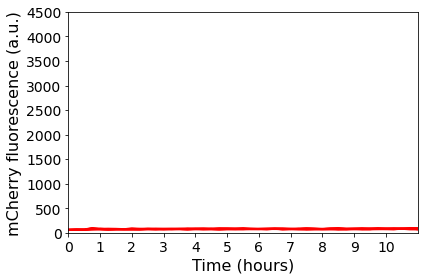

This plot was made using N=14 vesicles in sheet s16.
This plot was made using N=3 vesicles in sheet s17.
This plot was made using N=4 vesicles in sheet s18.


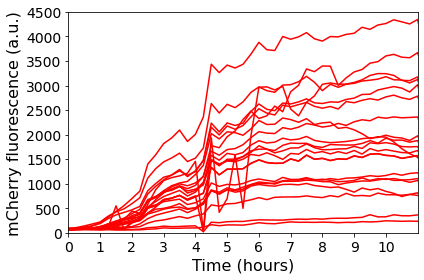

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_names = ["data_NC1-plasmid.xlsx", "data_PC.xlsx"]
faulty_time_points = []

# Define a function to read and process each file
def load_data(file_name, fluorophore='GFP'):
    # Load the Excel file
    xls = pd.ExcelFile(file_name)

    # Create a dictionary to store data from each sheet
    data_dict = {}

    for sheet_name in xls.sheet_names:
        # Read each sheet into a DataFrame
        df = xls.parse(sheet_name)

        # Extract the Time column
        time = df['Time [min]']

        # Remove faulty time points for "data_rescaled_PC.xlsx"
        if "PC" in file_name:
            mask = ~time.isin(faulty_time_points)
            time = time[mask]
            df = df[mask]

        # Extract columns based on the selected fluorophore (either 'GFP' or 'TexRed')
        fluor_columns = [col for col in df.columns if fluorophore in col]
        fluorescence_data = df[fluor_columns]

        # Store the data in the dictionary
        data_dict[sheet_name] = (time, fluorescence_data)

    return data_dict

# Define a function to plot the data
def plot_fluorescence(data_dict, fluorophore='GFP', file_name=""):
    plt.figure(figsize=(6, 4))

    # Plot data for each sheet
    for sheet_name, (time, fluorescence_data) in data_dict.items():
        # Convert time to hours
        time_hours = time / 60

        # Filter time range between 0 and 20 hours
        mask = (time_hours >= 0) & (time_hours <= 15)
        time_hours = time_hours[mask]
        fluorescence_data = fluorescence_data[mask]

        # Print the number of vesicles (data points) for each replicate (sheet)
        num_vesicles = fluorescence_data.shape[1]
        print(f'This plot was made using N={num_vesicles} vesicles in sheet {sheet_name}.')

        # Plot each column as a separate line
        for col in fluorescence_data.columns:
            plt.plot(time_hours, fluorescence_data[col], label=f"{sheet_name} - {col}", color='red')

    # Customize plot
    plt.xlabel('Time (hours)', fontsize=16)
    #plt.ylabel(f'{fluorophore} Fluorescence (a.u.)', fontsize=14)
    plt.ylabel('mCherry fluorescence (a.u.)', fontsize=16)
    
    #plt.title(f'{fluorophore} Fluorescence over Time - {file_name}', fontsize=16)
    plt.xticks(np.arange(0, 11, 1), fontsize=14)  # Ticks every hour
    plt.yticks(fontsize=14)
    plt.ylim(0, 4500)
    plt.xlim(0, 11)
    plt.tight_layout()
    #plt.savefig(f'{file_name} kinetics cascade.svg', format='svg')
    plt.show()

# Load and plot data for each file
for file_name in file_names:
    data_dict_red = load_data(file_name, fluorophore='TexRed')
    plot_fluorescence(data_dict_red, fluorophore='TexRed', file_name=file_name)